### StandardScaler
* 기본 스케일. 평균과 표준편차 사용
* 각 특성(feature)d의평균을0, 분산을 1로 변경


In [1]:
import mglearn


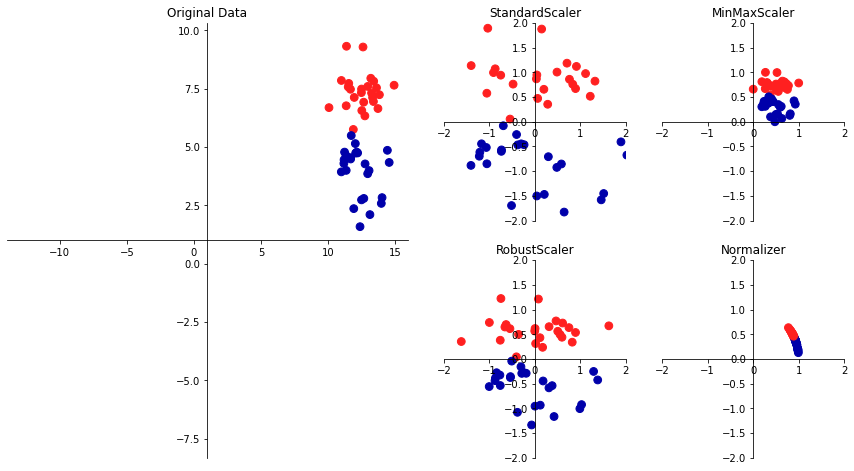

In [2]:
mglearn.plots.plot_scaling()


In [3]:
### 한글 폰트 설정
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
 font_name = font_manager.FontProperties(fname=path).get_name()
 rc('font', family=font_name)
elif platform.system()=="Darwin":
 rc('font', family='AppleGothic')
else:
 print("Unknown System")


## 1-1-4 데이터 변환 실습
* 데이터 셋 : cancer 데이터 (569개, 30열

In [5]:
from sklearn.datasets import load_breast_cancer  #라이브러리에 있는 모델을 가져옴
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
print("[cancer.keys()] \n{}".format(cancer.keys()))
print("유방암 데이터의 형태 : {}".format(cancer.data.shape))

[cancer.keys()] 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
유방암 데이터의 형태 : (569, 30)


In [6]:
# 데이터 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=77)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


## MinMaxScaler를 이용

#### 객체생성 > fit > transform

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  # 객체 생성
scaler.fit(X_train)   # 우리가 가진 변수의 최소값과 최대값을 파악해서 학습해서 0과 1로 

MinMaxScaler()

In [9]:
# 넘파이 없이 최대값, 최소값을 구하면 소수점이 너무 안예쁘게 나옴. 따라서 넘파이를 사전에 적용!

import numpy as np
# np.set_printoptions(precision=2)
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})

In [10]:
X_train_scaled = scaler.transform(X_train)
print("변환된 후 크기 : {}".format(X_train_scaled.shape))
print("변환전 최대, 최소 : \n {}, {}".format(X_train.max(axis=0),
 X_train.min(axis=0)))
print()
print("변환후 최대, 최소 : \n {}, {}".format(X_train_scaled.max(axis=0),
 X_train_scaled.min(axis=0)))


#30개 열별로의 최대값과 최소값은 원래 이랬고, MinMax로 정규화한 후에는 1과0으로 변환 되었음 

변환된 후 크기 : (426, 30)
변환전 최대, 최소 : 
 [28.110 39.280 188.500 2499.000 0.145 0.345 0.427 0.201 0.304 0.096 2.873
 4.885 21.980 525.600 0.031 0.106 0.396 0.053 0.079 0.030 33.120 47.160
 220.800 3432.000 0.223 1.058 1.252 0.291 0.577 0.207], [7.691 10.380 47.920 170.400 0.053 0.019 0.000 0.000 0.106 0.050 0.117
 0.360 0.771 7.254 0.002 0.002 0.000 0.000 0.008 0.001 8.678 12.490 54.490
 223.600 0.071 0.027 0.000 0.000 0.157 0.055]

변환후 최대, 최소 : 
 [1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000
 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000
 1.000 1.000 1.000 1.000 1.000 1.000], [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000]


## 변환전 후, 시각화

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

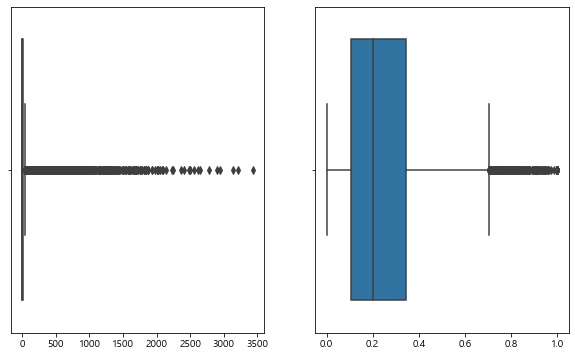

In [12]:
#변환전
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(X_train)

#변환후
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)

## Standard Sclaer 

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  

# 같은 내용 다른 방법
X_train_scaler = scaler.fit_transform(X_train)
#X_train_scaler = scaler.fit(X_train).transform(X_train)

print("변경전 :", X_train.max(), X_train.min() )
print("변경후 :", X_train_scaler.max(), X_train_scaler.min() )

변경전 : 3432.0 0.0
변경후 : 11.587694680416146 -3.0966340529458245


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'X_train_scaler_d' is not defined

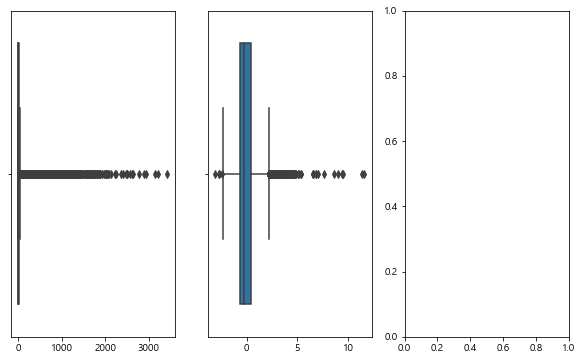

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(10,6))
sns.boxplot(X_train, ax=axes[0])
sns.boxplot(X_train_scaler, ax=axes[1])
sns.boxplot(X_train_scaler_d, ax=axes[2])

## 훈련데이터 셋과 테스트 데이터 셋을 같은 스케일을 적용해야 함.

In [22]:
from sklearn.datasets import make_blobs
# 인위적인 데이터셋 생성
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

# 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

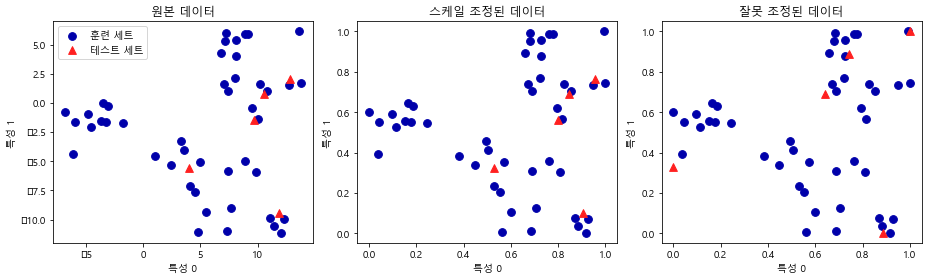

In [25]:
# 훈련 세트와 테스트 세트의 산점도를 그립니다
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="훈련 세트", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="테스트 세트", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")
# MinMaxScaler를 사용해 스케일을 조정합니다
scaler = MinMaxScaler()
scaler.fit(X_train)
# X_train이 데이터가 기준
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 데이터의 산점도를 그립니다
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="훈련 세트", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="테스트 세트", s=60)
axes[1].set_title("스케일 조정된 데이터")


# 테스트 세트의 스케일을 따로 조정합니다
# 테스트 세트의 최솟값은 0, 최댓값은 1이 됩니다
# 이는 예제를 위한 것으로 절대로 이렇게 사용해서는 안됩니다
tr_scaler = MinMaxScaler()
tr_scaler.fit(X_train)
# X_train이 데이터가 기준
X_train_scaled1 = tr_scaler.transform(X_train)
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
# X_test이 데이터가 기준
X_test_scaled1 = test_scaler.transform(X_test)



# 잘못 조정된 데이터인 이유: train으로 할 건지, test로 할건지 하나의 데이터를 정해야 한다. 
# 잘못 조정된 데이터의 산점도를 그립니다
axes[2].scatter(X_train_scaled1[:, 0], X_train_scaled1[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled1[:, 0], X_test_scaled1[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("잘못 조정된 데이터")
for ax in axes:
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
fig.tight_layout()

* 첫번째 그래프 원본 데이터
* 두번째 그래프 정상
* 세번째 그래프 - 각각 MinMaxScaler()이 되면  
scaler = MinMaxScaler()  
test_scaler = MinMaxScaler()  
원본 데이터와 다르게 표현됨.  